In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [10]:
pd.read_excel("data/Sucio_pisos.xlsx")

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Comuna
0,99245550,2850,49,49,2,1,0,19/12/2022,San Miguel
1,75000000,2153,62,62,3,2,0,19/12/2022,Estación Central
2,68949540,1980,39,39,2,1,0,19/12/2022,Independencia
3,70342460,2020,46,46,2,1,0,19/12/2022,San Joaquín
4,971561700,27900,340,340,4,3,3,19/12/2022,Las Condes
...,...,...,...,...,...,...,...,...,...
9622,69646000,2000,70,70,1,1,0,04/12/2022,Independencia
9623,390017600,11200,147,147,4,3,3,04/12/2022,Las Condes
9624,73128300,2100,33,33,1,1,0,04/12/2022,Santiago
9625,80000000,2297,65,65,3,2,1,04/12/2022,Pudahuel


In [18]:
piso=pd.read_excel("data/Sucio_pisos.xlsx")

In [19]:
piso

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Comuna
0,99245550,2850,49,49,2,1,0,19/12/2022,San Miguel
1,75000000,2153,62,62,3,2,0,19/12/2022,Estación Central
2,68949540,1980,39,39,2,1,0,19/12/2022,Independencia
3,70342460,2020,46,46,2,1,0,19/12/2022,San Joaquín
4,971561700,27900,340,340,4,3,3,19/12/2022,Las Condes
...,...,...,...,...,...,...,...,...,...
9622,69646000,2000,70,70,1,1,0,04/12/2022,Independencia
9623,390017600,11200,147,147,4,3,3,04/12/2022,Las Condes
9624,73128300,2100,33,33,1,1,0,04/12/2022,Santiago
9625,80000000,2297,65,65,3,2,1,04/12/2022,Pudahuel


In [20]:
piso.rename(columns={"Uf_log":"UF_log"},inplace=True)


In [21]:
piso

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Comuna
0,99245550,2850,49,49,2,1,0,19/12/2022,San Miguel
1,75000000,2153,62,62,3,2,0,19/12/2022,Estación Central
2,68949540,1980,39,39,2,1,0,19/12/2022,Independencia
3,70342460,2020,46,46,2,1,0,19/12/2022,San Joaquín
4,971561700,27900,340,340,4,3,3,19/12/2022,Las Condes
...,...,...,...,...,...,...,...,...,...
9622,69646000,2000,70,70,1,1,0,04/12/2022,Independencia
9623,390017600,11200,147,147,4,3,3,04/12/2022,Las Condes
9624,73128300,2100,33,33,1,1,0,04/12/2022,Santiago
9625,80000000,2297,65,65,3,2,1,04/12/2022,Pudahuel


# Análisis exploratorio de datos depurados (EDA)

In [22]:
from funpymodeling.exploratory import status
status(piso).sort_values(by="q_nan", ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Precio,0,0.0,0,0.000000,2138,int64
1,UF,0,0.0,6,0.000623,2049,int64
2,m2_Construidos,0,0.0,118,0.012257,413,int64
3,m2_totales,0,0.0,118,0.012257,413,int64
4,Habitaciones,0,0.0,0,0.000000,15,int64
5,Banos,0,0.0,0,0.000000,12,int64
6,Estacionamientos,0,0.0,4969,0.516152,55,int64
7,Publi,0,0.0,0,0.000000,71,object
8,Comuna,0,0.0,0,0.000000,42,object


In [23]:
piso.describe().T.round(0)


,count,mean,std,min,25%,50%,75%,max
Precio,9627.0,968386364.0,4.553368e+10,2390.0,81834050.0,120000000.0,219384900.0,3.238539e+12
UF,9627.0,27809.0,1.307575e+06,0.0,2350.0,3445.0,6300.0,9.300000e+07
m2_Construidos,9627.0,135.0,1.699000e+03,0.0,41.0,56.0,85.0,1.400000e+05
m2_totales,9627.0,135.0,1.699000e+03,0.0,41.0,56.0,85.0,1.400000e+05
Habitaciones,9627.0,2.0,1.000000e+00,1.0,1.0,2.0,3.0,1.110000e+02
Banos,9627.0,2.0,1.000000e+00,1.0,1.0,2.0,2.0,1.600000e+01
Estacionamientos,9627.0,3.0,5.900000e+01,0.0,0.0,0.0,1.0,2.021000e+03


In [24]:
piso.max()

Precio              3238539000000
UF                       93000000
m2_Construidos             140000
m2_totales                 140000
Habitaciones                  111
Banos                          16
Estacionamientos             2021
Publi                  31/12/2021
Comuna                      Ñuñoa
dtype: object

## Observamos la distribución de los datos

In [25]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(piso[variable], bins = 50 , rwidth=.85)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribución de los Datos con Histograma".format(variable))
    plt.show()

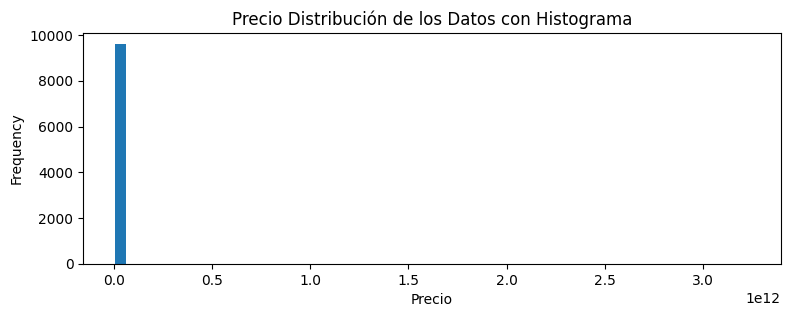

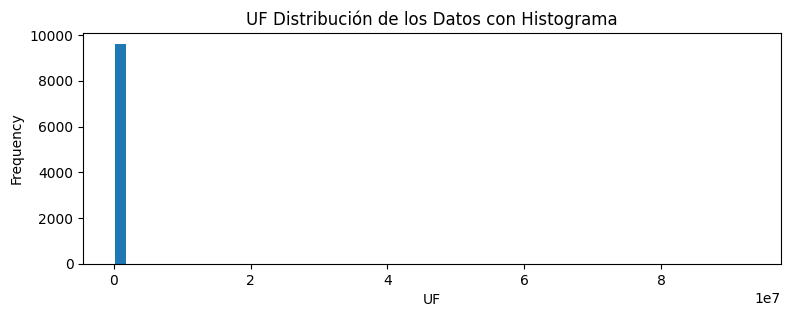

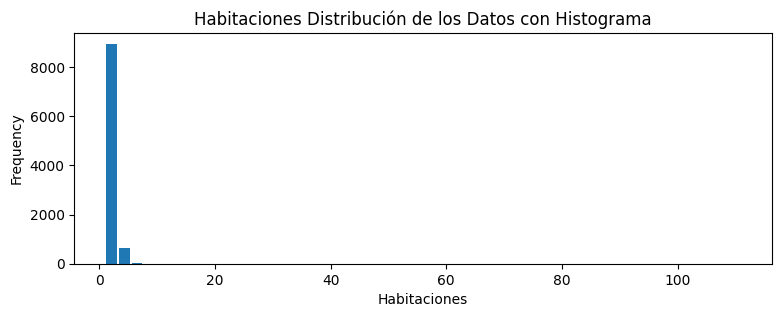

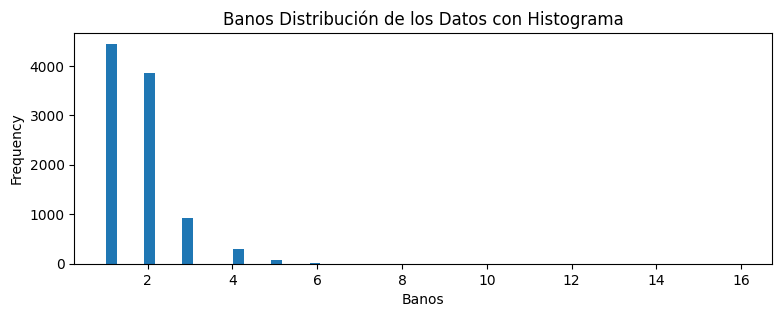

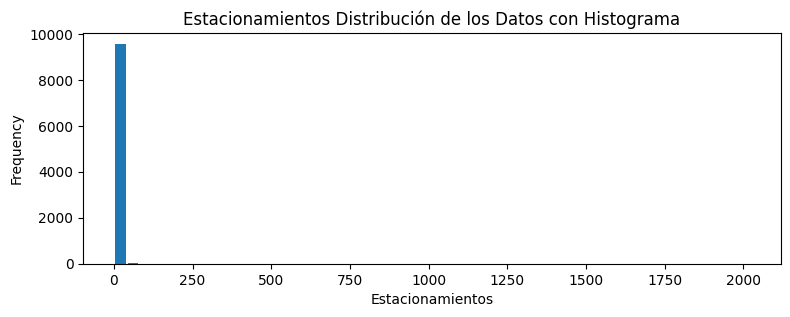

In [26]:
numero_variable =['Precio', 'UF', 'Habitaciones', 'Banos',
       'Estacionamientos']

for n in numero_variable:
    plot_hist(n)

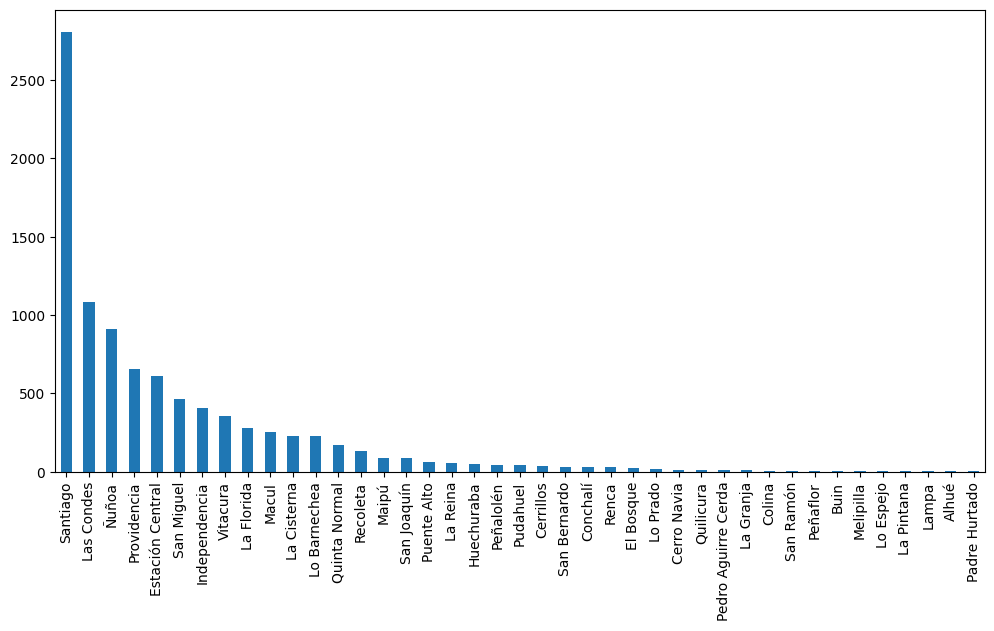

In [236]:
fig, ax = plt.subplots()
grf=piso["Comuna"].value_counts().plot(ax=ax, kind='bar',figsize = (12,6))

C:\Users\diazb\AppData\Local\Temp\ipykernel_16100\2269102346.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(piso.corr(), annot=True)


<AxesSubplot: >

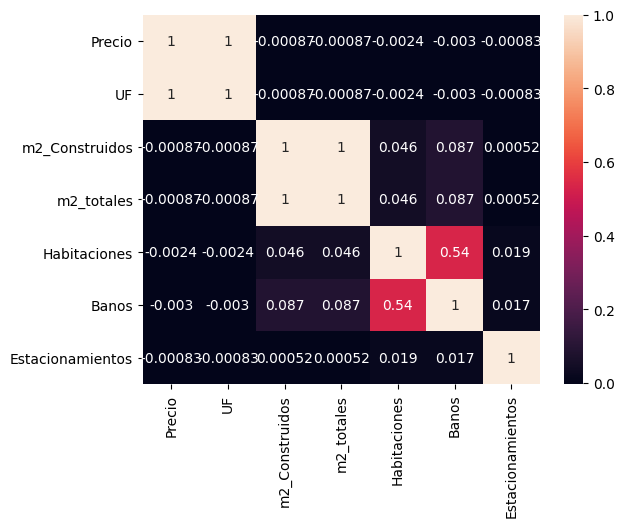

In [27]:
sns.heatmap(piso.corr(), annot=True)

# Union de Dataframe

In [28]:
pd.read_excel("data/numero_pisos.xlsx")

,Comuna,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,Distancia a Educación Inicial (m),Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica,Número de establecimientos eduacion basica,Número de establecimientos privados,Distancia a Educación Basica (m),...,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Ingreso promedio del hogar por Comuna,% de Acceso deficitario a Servicios Basicos,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
0,Santiago,402847,1868007.66,314094.72,94,389.63,2.16,77,11,384.80,...,59.57,9.63,10.62,3.37,14405,1279990.0,3.595824,589.23,48.24,85
1,Cerrillos,80710,1176964.65,305502.19,44,349.78,1.05,20,0,733.70,...,40.00,27.42,8.70,2.35,1847,716905.6,0.720013,693.22,9.28,90
2,Cerro Navia,132401,786372.48,291964.59,63,278.31,0.93,34,0,362.07,...,19.00,34.64,12.84,4.48,4872,531362.4,1.571147,510.54,2.75,110
3,Conchalí,126800,417852.00,340860.35,66,308.24,1.38,36,1,361.62,...,25.00,29.37,10.44,4.46,4409,540747.9,3.575690,681.45,4.79,80
4,El Bosque,162415,329261.04,280109.16,103,294.30,1.47,49,1,382.68,...,32.56,22.65,10.22,2.61,4084,643897.7,10.784120,641.95,4.71,105
5,Estación Central,140746,533763.86,297521.89,68,328.11,1.37,29,1,441.76,...,52.94,23.45,11.87,4.20,5574,650501.8,2.424891,672.85,10.19,100
6,Huechuraba,98500,1061523.43,299286.88,30,795.39,0.50,13,6,1331.51,...,18.00,28.84,8.08,2.64,2331,607102.0,1.280024,690.32,1.96,90
7,Independencia,100059,155440.97,126954.77,33,359.21,1.50,25,3,360.06,...,18.00,20.91,13.56,4.37,4403,502782.8,2.605929,661.70,7.64,90
8,La Cisterna,89889,160366.50,128427.75,50,330.55,1.94,34,2,402.71,...,75.00,17.82,6.35,2.13,1800,918453.5,2.244986,707.29,1.98,90
9,La Florida,366376,1375949.93,1159154.11,182,427.54,1.32,107,13,556.75,...,57.58,18.99,5.59,2.12,6098,849390.8,0.000000,810.97,15.28,90


In [29]:
variables=pd.read_excel("data/numero_pisos.xlsx")

In [30]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 39 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      48 non-null     object 
 1   Poblacion total 2020                                                                        48 non-null     int64  
 2   Superficie de Área Verde m²                                                                 48 non-null     float64
 3   Superficie Plazas m²                                                                        48 non-null     float64
 4   Número de establecimientos educacion inicial                                                48 non-null     int64  
 5   Distancia a Educación Inicial (m)            

In [31]:
status(variables).sort_values(by="q_nan",ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Comuna,0,0.0,0,0.000000,48,object
29,Porcentaje de unidades vecinales que tienen e...,0,0.0,1,0.020833,34,float64
22,Total de residuos (t),0,0.0,0,0.000000,48,float64
23,Porcentaje de residuos municipales valorizados,0,0.0,14,0.291667,33,float64
24,Porcentaje de viviendas en mal estado y/o ca...,0,0.0,0,0.000000,48,float64
25,Porcentaje de participación del FCM en el Ingr...,0,0.0,0,0.000000,48,float64
26,Víctimas Robo con violencia o Intimidación,0,0.0,0,0.000000,48,int64
27,Víctimas Robo por Sorpresa,0,0.0,0,0.000000,47,int64
28,Número de denuncias por delito en el espacio ...,0,0.0,0,0.000000,39,float64
30,Porcentaje de la población en situación de po...,0,0.0,0,0.000000,48,float64


## Cambiamos el orden de la columnas para favorecer el cruce de datos con el dataframe variables

In [32]:
piso = piso[['Comuna','m2_totales', 'Habitaciones', 'Banos',
       'Estacionamientos', 'Publi','Precio', 'UF',]] 
       # cambiamos el orden de la columnas para favorecer el cruce de datos con el dataframe variables

In [33]:
piso.columns

Index(['Comuna', 'm2_totales', 'Habitaciones', 'Banos', 'Estacionamientos',
       'Publi', 'Precio', 'UF'],
      dtype='object')

In [34]:
piso["Comuna"].unique().shape

(42,)

## Pasamos la columna comuna a indice para facilitar la union con el dataframe principal pisos

In [35]:
variables.set_index("Comuna",inplace=True)

In [36]:
variables

,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,Distancia a Educación Inicial (m),Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica,Número de establecimientos eduacion basica,Número de establecimientos privados,Distancia a Educación Basica (m),Número de establecimientos atencion primaria,...,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Ingreso promedio del hogar por Comuna,% de Acceso deficitario a Servicios Basicos,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
Comuna,,,,,,,,,,,,,,,,,,,,,
Santiago,402847,1868007.66,314094.72,94,389.63,2.16,77,11,384.80,7,...,59.57,9.63,10.62,3.37,14405,1279990.0,3.595824,589.23,48.24,85
Cerrillos,80710,1176964.65,305502.19,44,349.78,1.05,20,0,733.70,4,...,40.00,27.42,8.70,2.35,1847,716905.6,0.720013,693.22,9.28,90
Cerro Navia,132401,786372.48,291964.59,63,278.31,0.93,34,0,362.07,8,...,19.00,34.64,12.84,4.48,4872,531362.4,1.571147,510.54,2.75,110
Conchalí,126800,417852.00,340860.35,66,308.24,1.38,36,1,361.62,9,...,25.00,29.37,10.44,4.46,4409,540747.9,3.575690,681.45,4.79,80
El Bosque,162415,329261.04,280109.16,103,294.30,1.47,49,1,382.68,10,...,32.56,22.65,10.22,2.61,4084,643897.7,10.784120,641.95,4.71,105
Estación Central,140746,533763.86,297521.89,68,328.11,1.37,29,1,441.76,6,...,52.94,23.45,11.87,4.20,5574,650501.8,2.424891,672.85,10.19,100
Huechuraba,98500,1061523.43,299286.88,30,795.39,0.50,13,6,1331.51,5,...,18.00,28.84,8.08,2.64,2331,607102.0,1.280024,690.32,1.96,90
Independencia,100059,155440.97,126954.77,33,359.21,1.50,25,3,360.06,4,...,18.00,20.91,13.56,4.37,4403,502782.8,2.605929,661.70,7.64,90
La Cisterna,89889,160366.50,128427.75,50,330.55,1.94,34,2,402.71,4,...,75.00,17.82,6.35,2.13,1800,918453.5,2.244986,707.29,1.98,90


# Unimos nuestras bases datos

In [37]:
union= piso.join(variables, on=["Comuna"], how= "inner")
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9626 entries, 0 to 8457
Data columns (total 46 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      9626 non-null   object 
 1   m2_totales                                                                                  9626 non-null   int64  
 2   Habitaciones                                                                                9626 non-null   int64  
 3   Banos                                                                                       9626 non-null   int64  
 4   Estacionamientos                                                                            9626 non-null   int64  
 5   Publi                                    

In [38]:
piso["Comuna"].unique().shape

(42,)

In [39]:
union["Comuna"].unique().shape

(41,)

In [40]:
union.corr()

C:\Users\diazb\AppData\Local\Temp\ipykernel_16100\2198893341.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  union.corr()


,m2_totales,Habitaciones,Banos,Estacionamientos,Precio,UF,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,...,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Ingreso promedio del hogar por Comuna,% de Acceso deficitario a Servicios Basicos,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
m2_totales,1.000000,0.045682,0.087272,0.000518,-0.000866,-0.000866,-0.029732,0.007118,0.006872,-0.043918,...,-0.046367,-0.002378,-0.037549,-0.037100,-0.037996,0.028989,-0.031038,0.033847,-0.021392,-0.017222
Habitaciones,0.045682,1.000000,0.537396,0.019384,-0.002413,-0.002413,-0.099121,0.030154,0.127607,-0.157314,...,-0.240176,-0.088638,-0.247398,-0.240635,-0.214145,0.186394,-0.198661,0.231434,-0.075095,-0.076995
Banos,0.087272,0.537396,1.000000,0.016614,-0.003001,-0.003001,-0.130324,0.151888,0.151842,-0.363552,...,-0.406539,-0.334307,-0.481293,-0.471520,-0.311985,0.485416,-0.338634,0.403009,-0.011829,-0.281320
Estacionamientos,0.000518,0.019384,0.016614,1.000000,-0.000827,-0.000827,0.054186,0.044420,0.133624,0.081813,...,-0.006605,0.032919,-0.012533,-0.029681,-0.004227,-0.023503,-0.035463,0.032174,0.000036,0.043671
Precio,-0.000866,-0.002413,-0.003001,-0.000827,1.000000,1.000000,-0.016099,-0.017829,-0.004737,-0.002902,...,0.014057,0.018678,0.010093,0.014338,-0.007535,-0.015988,0.002006,-0.001327,-0.018056,0.019990
UF,-0.000866,-0.002413,-0.003001,-0.000827,1.000000,1.000000,-0.016099,-0.017829,-0.004737,-0.002902,...,0.014057,0.018678,0.010093,0.014338,-0.007535,-0.015988,0.002006,-0.001327,-0.018056,0.019990
Poblacion total 2020,-0.029732,-0.099121,-0.130324,0.054186,-0.016099,-0.016099,1.000000,0.630243,0.435735,0.701347,...,0.488704,-0.297210,0.286522,0.159898,0.809956,0.016363,0.422763,-0.387527,0.824422,-0.000012
Superficie de Área Verde m²,0.007118,0.030154,0.151888,0.044420,-0.017829,-0.017829,0.630243,1.000000,0.347297,0.289304,...,0.142596,-0.431602,0.019248,-0.047540,0.512454,0.246518,0.258483,-0.249839,0.705780,-0.354713
Superficie Plazas m²,0.006872,0.127607,0.151842,0.133624,-0.004737,-0.004737,0.435735,0.347297,1.000000,0.455349,...,-0.091573,-0.010300,-0.273629,-0.338512,-0.057341,0.079614,-0.309223,0.375793,0.105917,0.219809
Número de establecimientos educacion inicial,-0.043918,-0.157314,-0.363552,0.081813,-0.002902,-0.002902,0.701347,0.289304,0.455349,1.000000,...,0.687573,0.320536,0.522952,0.438919,0.659691,-0.533652,0.386403,-0.433811,0.266676,0.457995


In [41]:
correlacion= union.corr()

C:\Users\diazb\AppData\Local\Temp\ipykernel_16100\2971588364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion= union.corr()


In [42]:
correlacion["UF"].sort_values(ascending=False)

UF                                                                                            1.000000
Precio                                                                                        1.000000
% otro sistema (Prevision Salud)                                                              0.043196
Superficie total de campamentos (ha)                                                          0.021510
Tiempo de viaje en trans publico hr punta                                                     0.019990
 Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF)           0.018678
Fallos suministro electrico                                                                   0.018463
% fonasa (Prevision Salud)                                                                    0.015219
Porcentaje de viviendas con situación de allegamiento externo                                 0.014338
 Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares v

# Utilizaremos como target UF

In [254]:
# veamos la correlacion entre las variables 

In [255]:
union.columns

Index(['Comuna', 'm2_totales', 'Habitaciones', 'Banos', 'Estacionamientos',
       'Publi', 'Precio', 'UF', 'UF_log', 'Poblacion total 2020',
       'Superficie de Área Verde m²', 'Superficie Plazas m²',
       'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
       'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)', '% fonasa (Prevision Salud)',
       '% ff.aa. y del orden (Prevision Salud)', '% isapre (Prevision Salud)',
       ' % ninguno (Prevision Salud)', '% otro sistema (Prevision Salud)',
       'Superficie total de campamentos (ha)',
       ' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suminist

In [43]:
cols_to_plot1= ['UF',
       'Poblacion total 2020', 'Superficie de Área Verde m²',
       'Superficie Plazas m²',' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suministro electrico',]

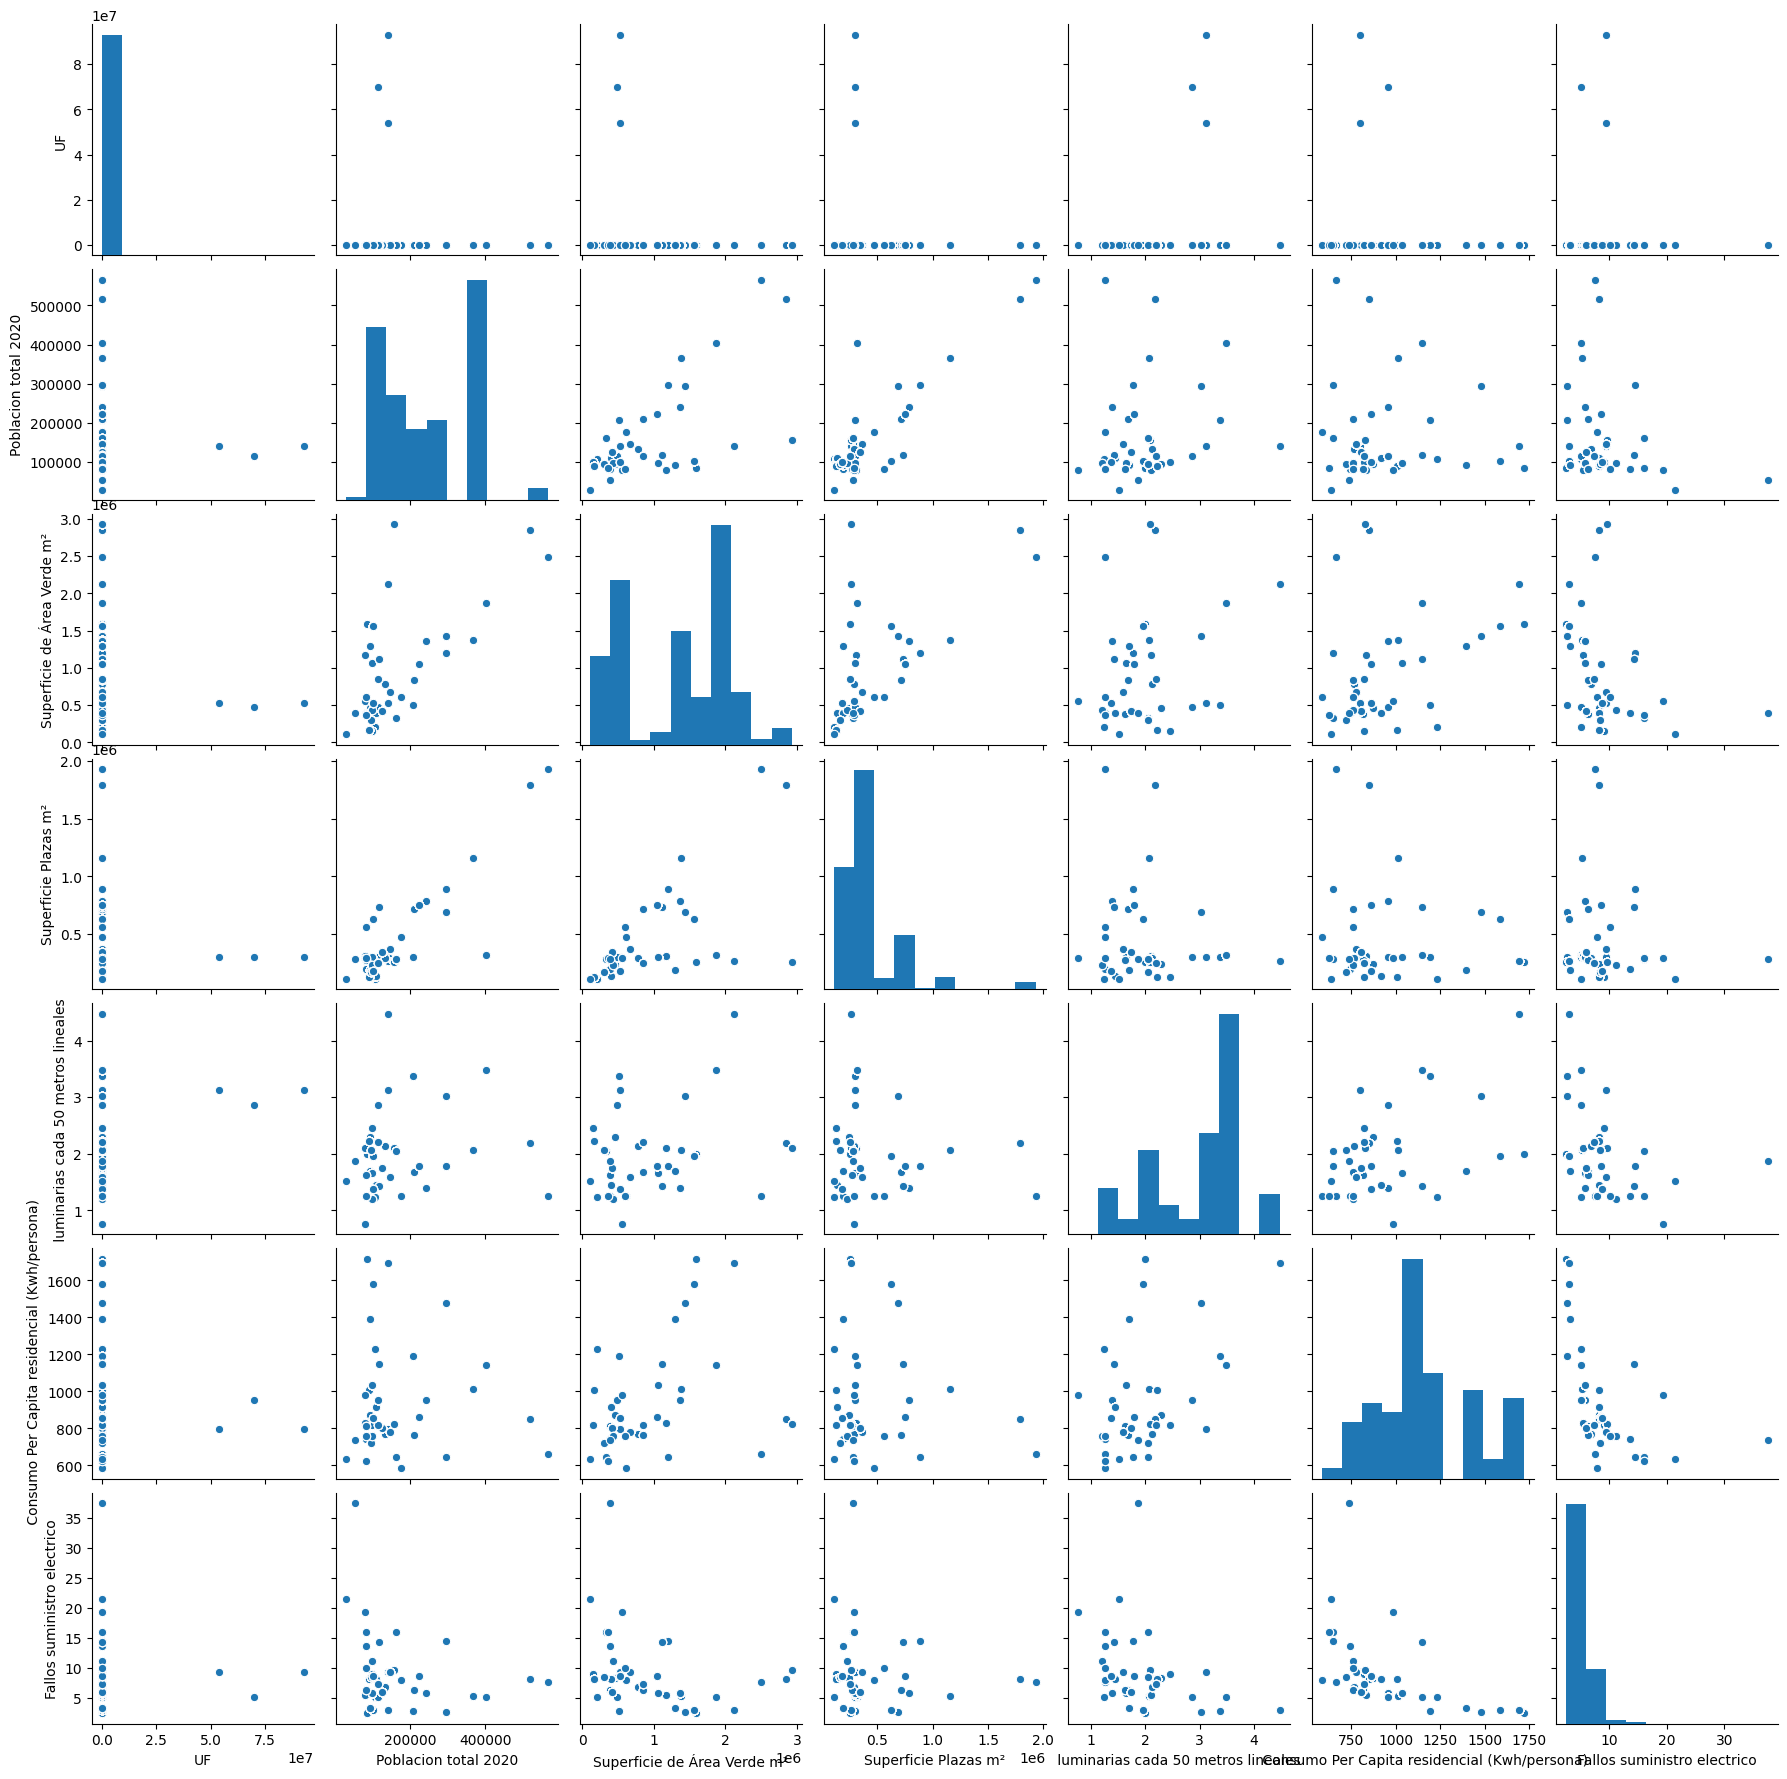

In [44]:
sns.pairplot(union[cols_to_plot1])

<AxesSubplot: >

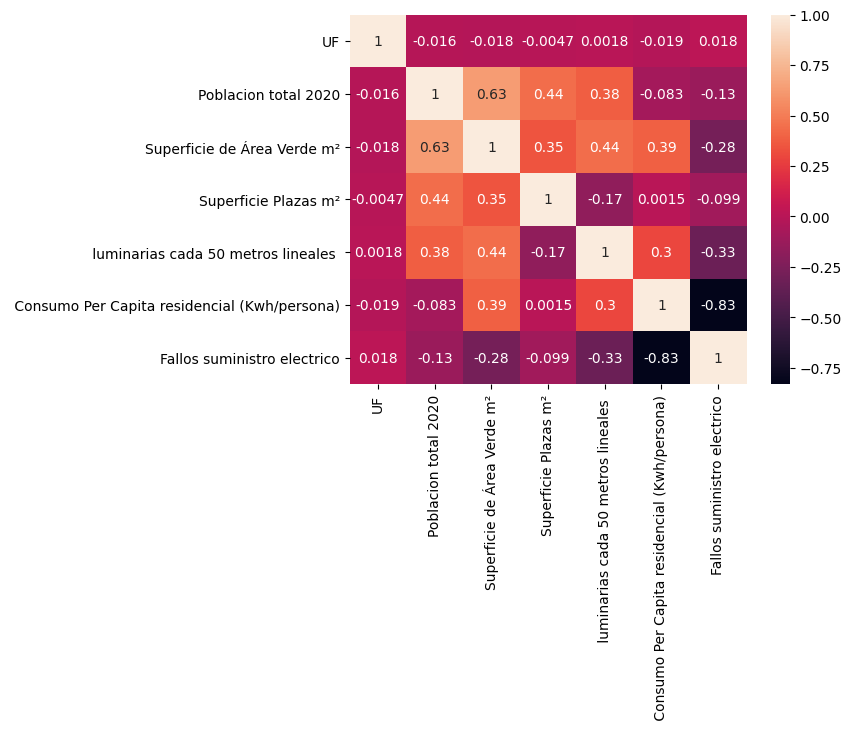

In [45]:
sns.heatmap(union[cols_to_plot1].corr(), annot=True)

In [51]:
# Educacion
cols_to_plot2= ['UF',
       'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
      ]

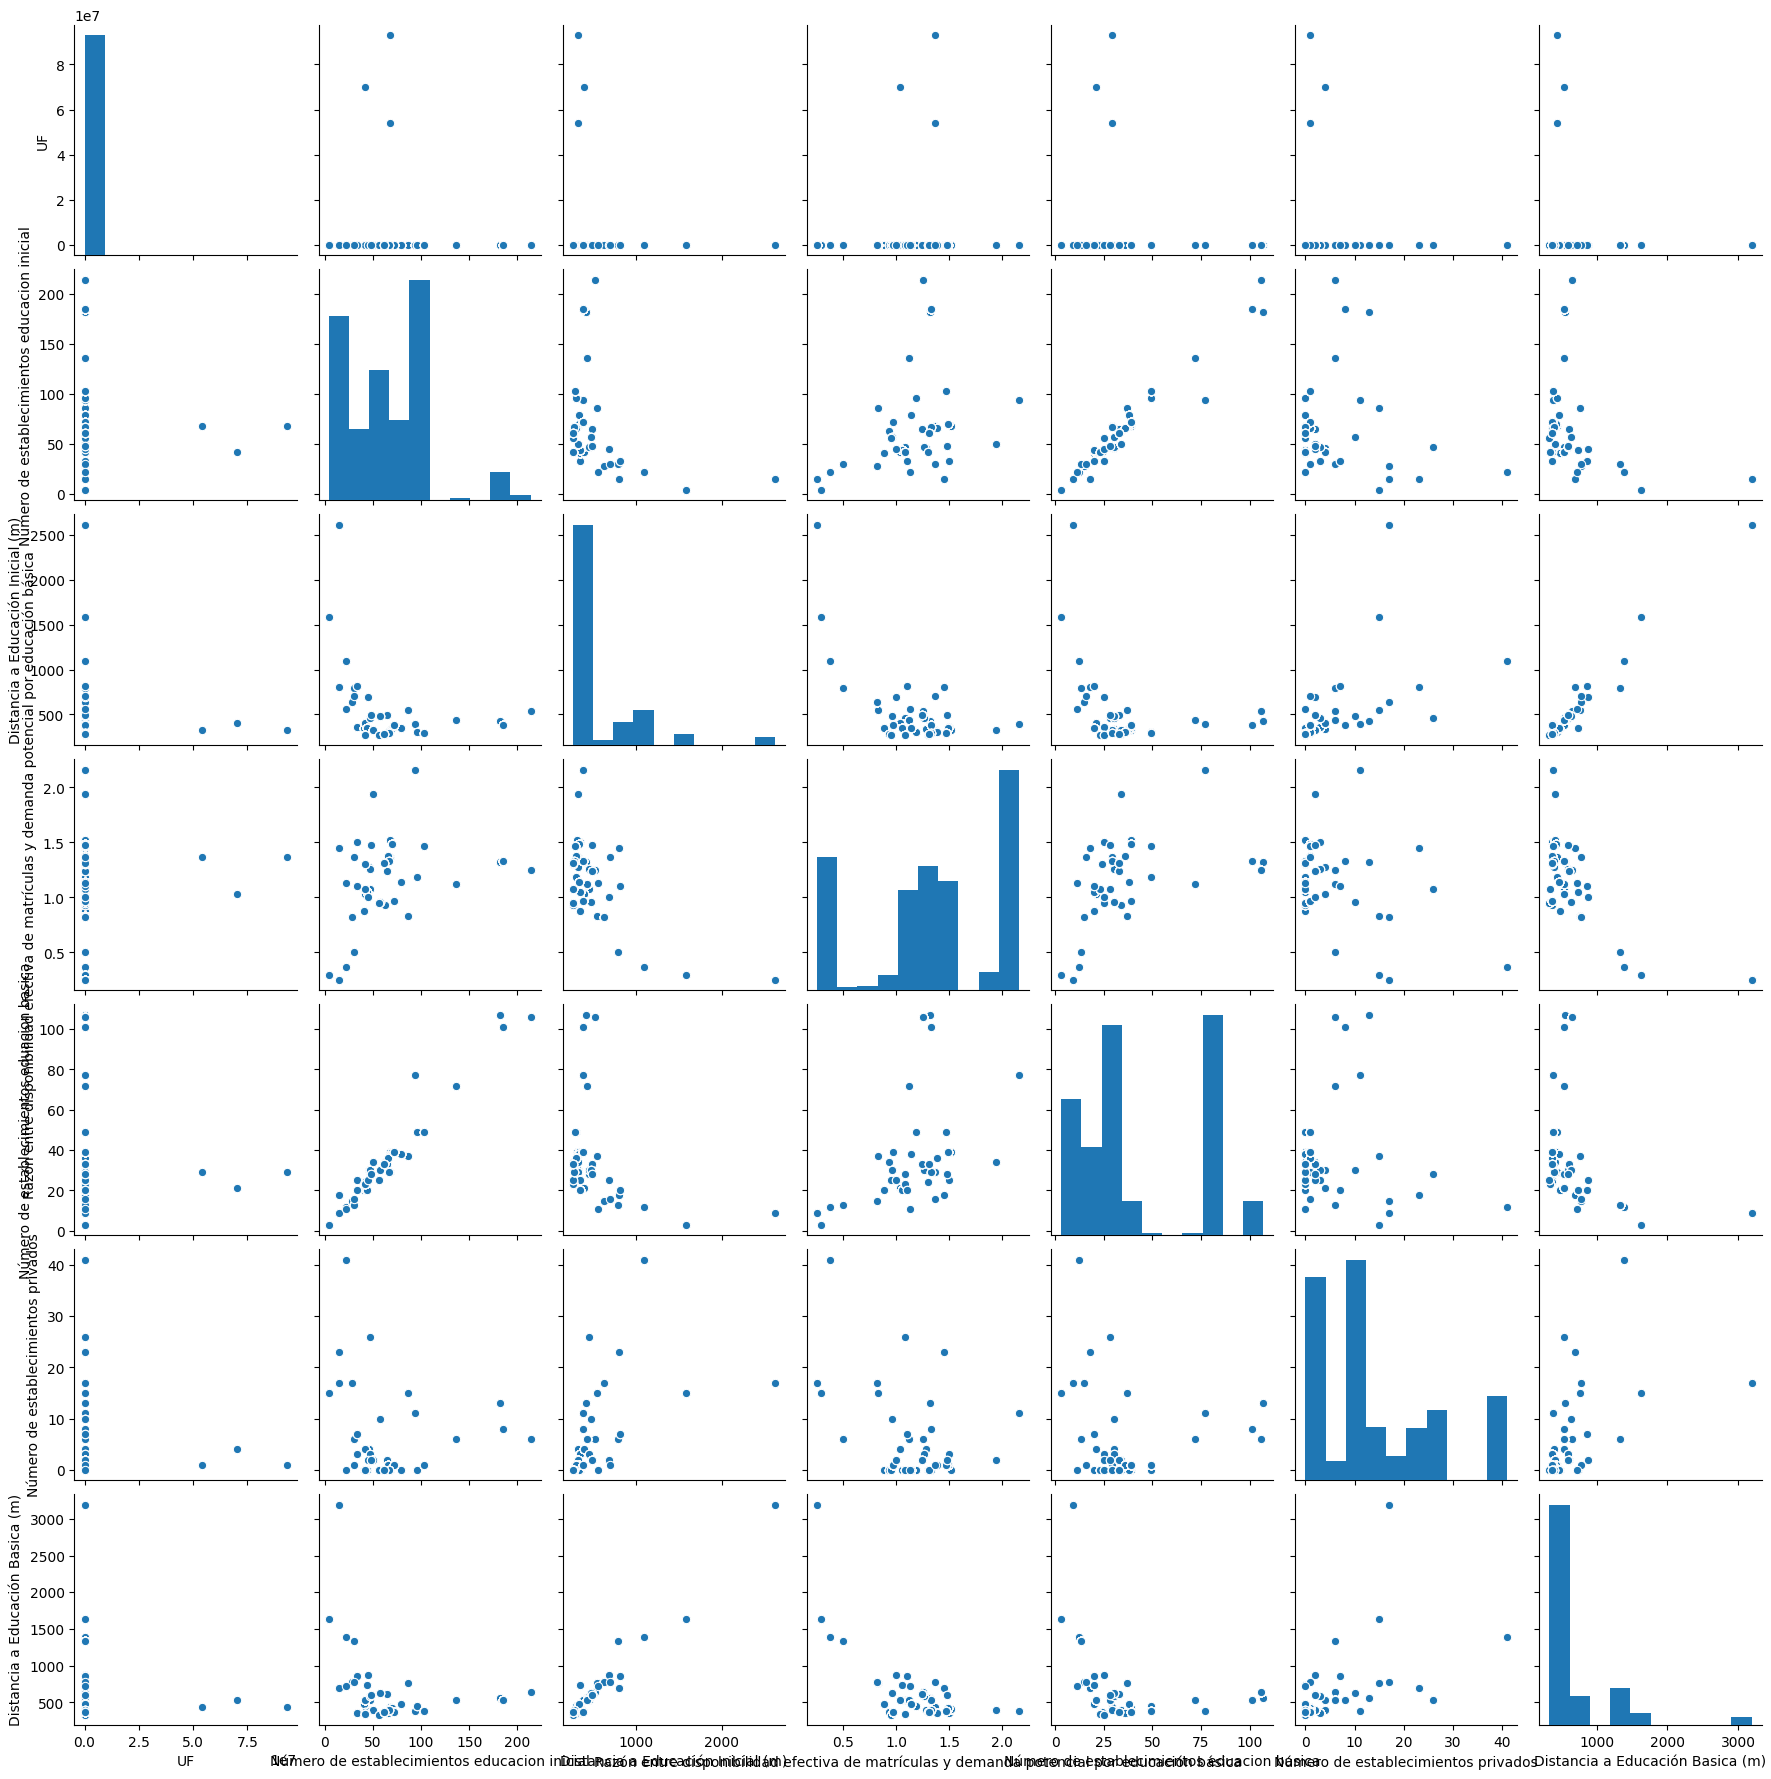

In [52]:
sns.pairplot(union[cols_to_plot2])

<AxesSubplot: >

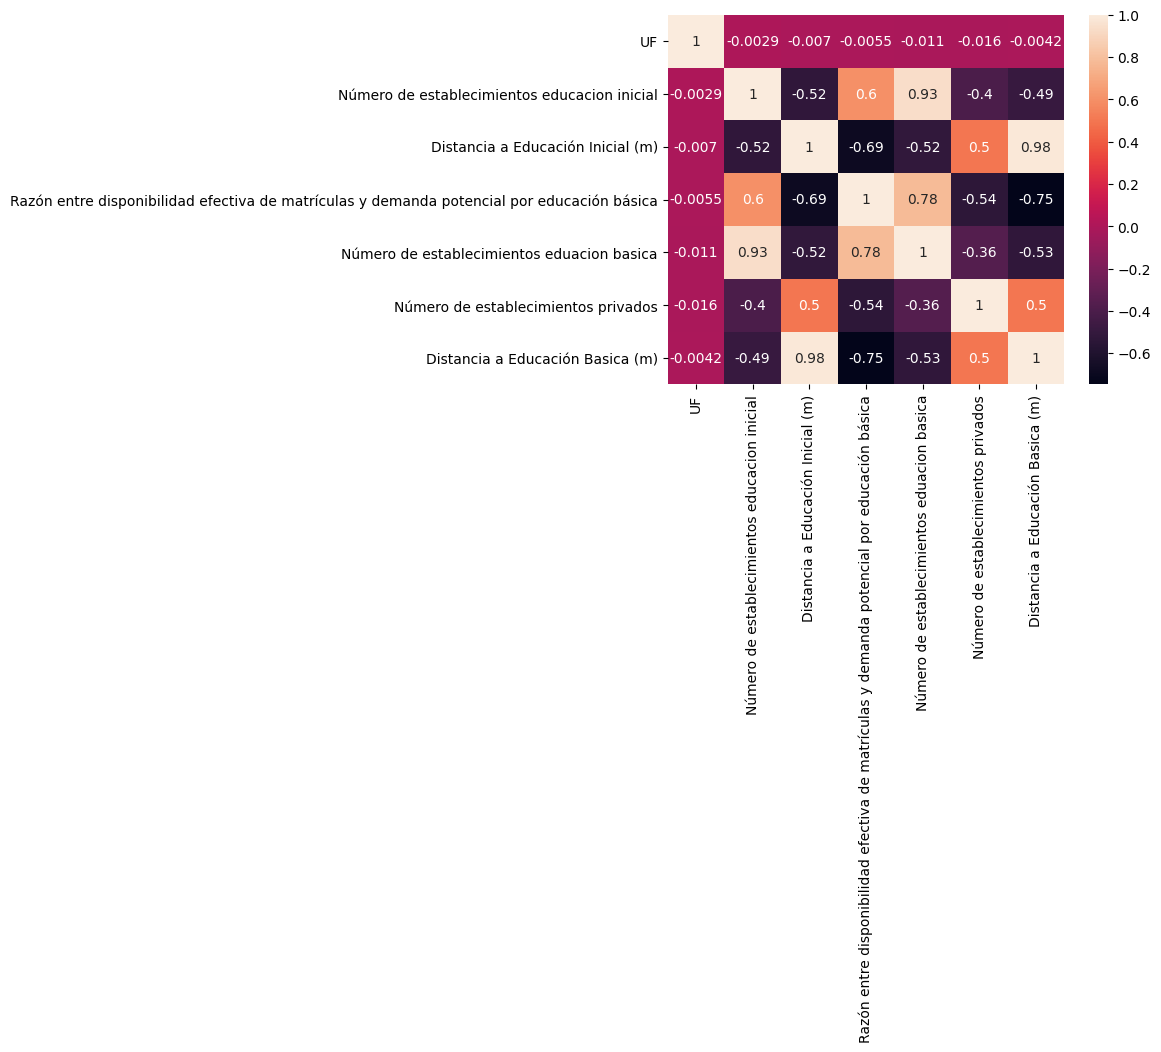

In [53]:
sns.heatmap(union[cols_to_plot2].corr(), annot=True)# podriamos eliminar numero de establecimiento de educacion inicial, distancia de eduacion basica

In [55]:
cols_to_plot3=["UF",'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)','% fonasa (Prevision Salud)',
       '% ff.aa. y del orden (Prevision Salud)', '% isapre (Prevision Salud)',
       ' % ninguno (Prevision Salud)', '% otro sistema (Prevision Salud)',
]

<AxesSubplot: >

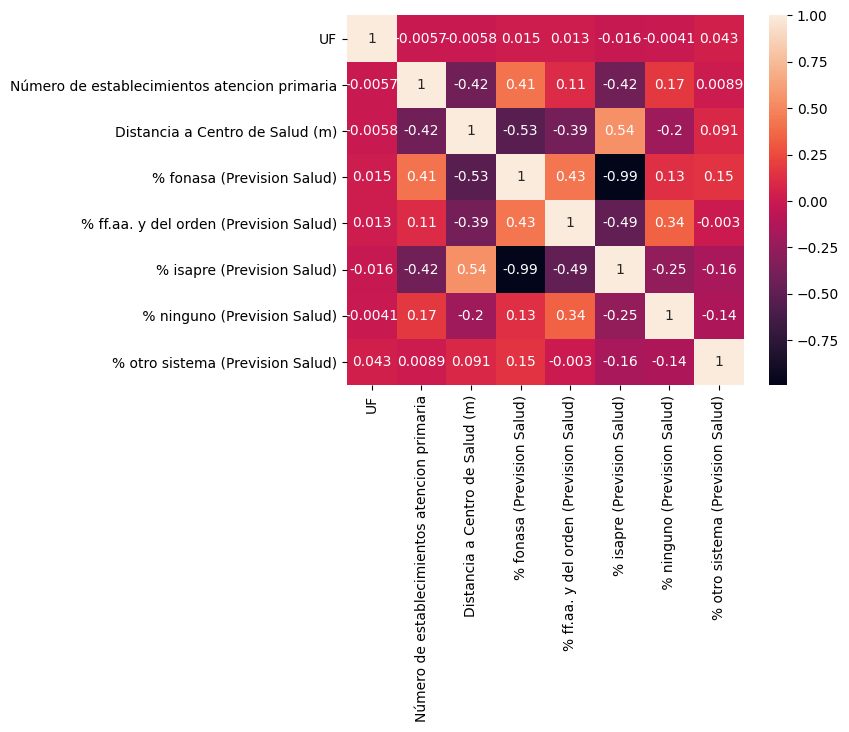

In [56]:
sns.heatmap(union[cols_to_plot3].corr(), annot=True)# habria que barajar si quitar la columna de Fonasa

In [57]:
#infraestructura y servicios y medioambiente
cols_to_plot4=["UF",'porcentaje manzanas con veredas con buena calidad de pavimento',
       'Total de residuos (t)',
       ' Porcentaje de residuos municipales valorizados',
       ' Porcentaje de viviendas en mal estado  y/o carente  servicios básicos',
       'Porcentaje de participación del FCM en el Ingreso Municipal Total',
       'Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares',
       'Longitud ciclovías (km)', 'Tiempo de viaje en trans publico hr punta','% de Acceso deficitario a Servicios Basicos ',]

<AxesSubplot: >

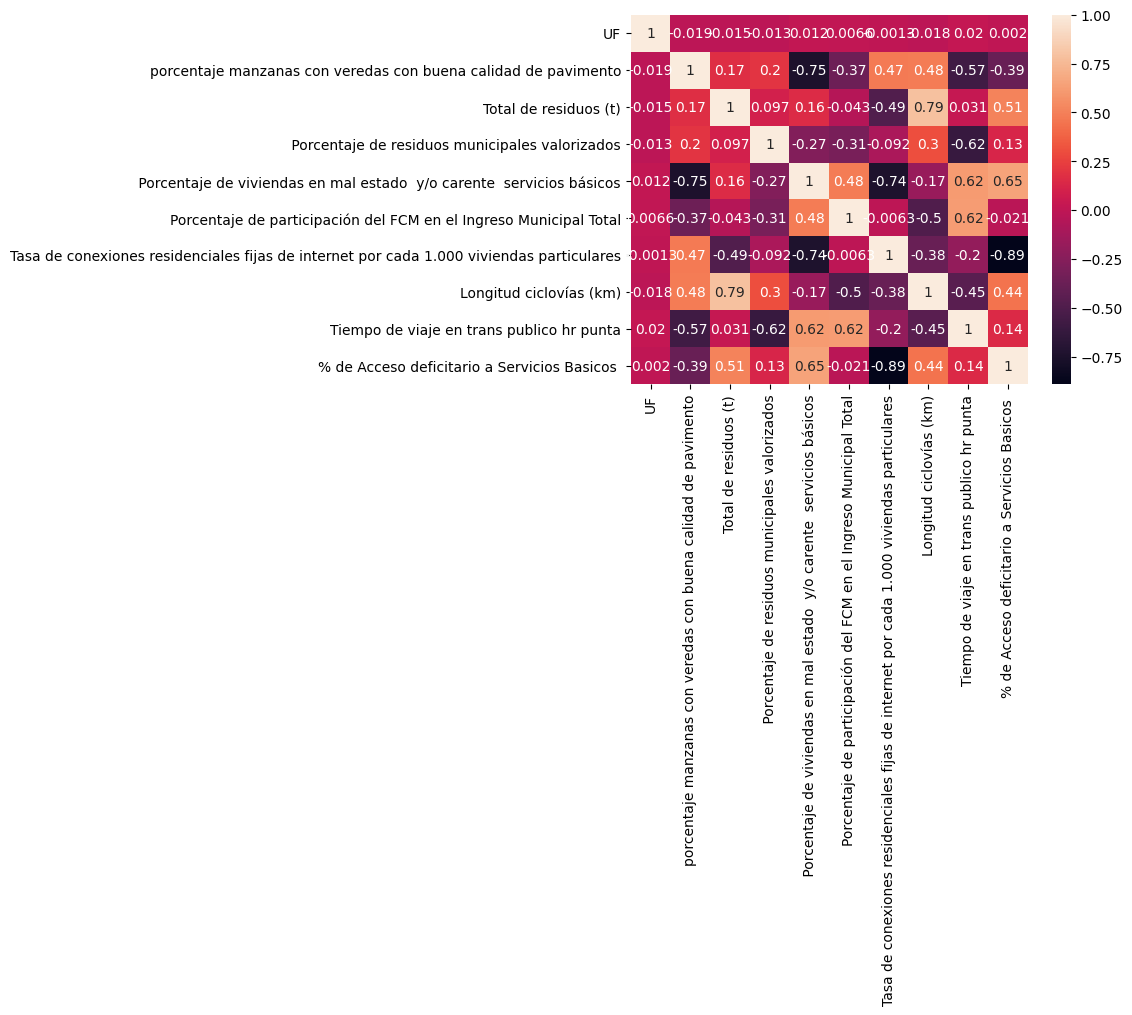

In [58]:
sns.heatmap(union[cols_to_plot4].corr(), annot=True)

In [60]:
cols_to_plot5 = ["UF",'Víctimas Robo con violencia o Intimidación',
       'Víctimas Robo por Sorpresa',
       ' Número de denuncias por delito en el espacio público cada 100 habitantes',
       ' Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables',
       ' Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF)',
       'Porcentaje de Hacinamiento',
       'Porcentaje de viviendas con situación de allegamiento externo',
       ' Requerimiento de viviendas nuevas urbanas','Ingreso promedio del hogar por Comuna',]

<AxesSubplot: >

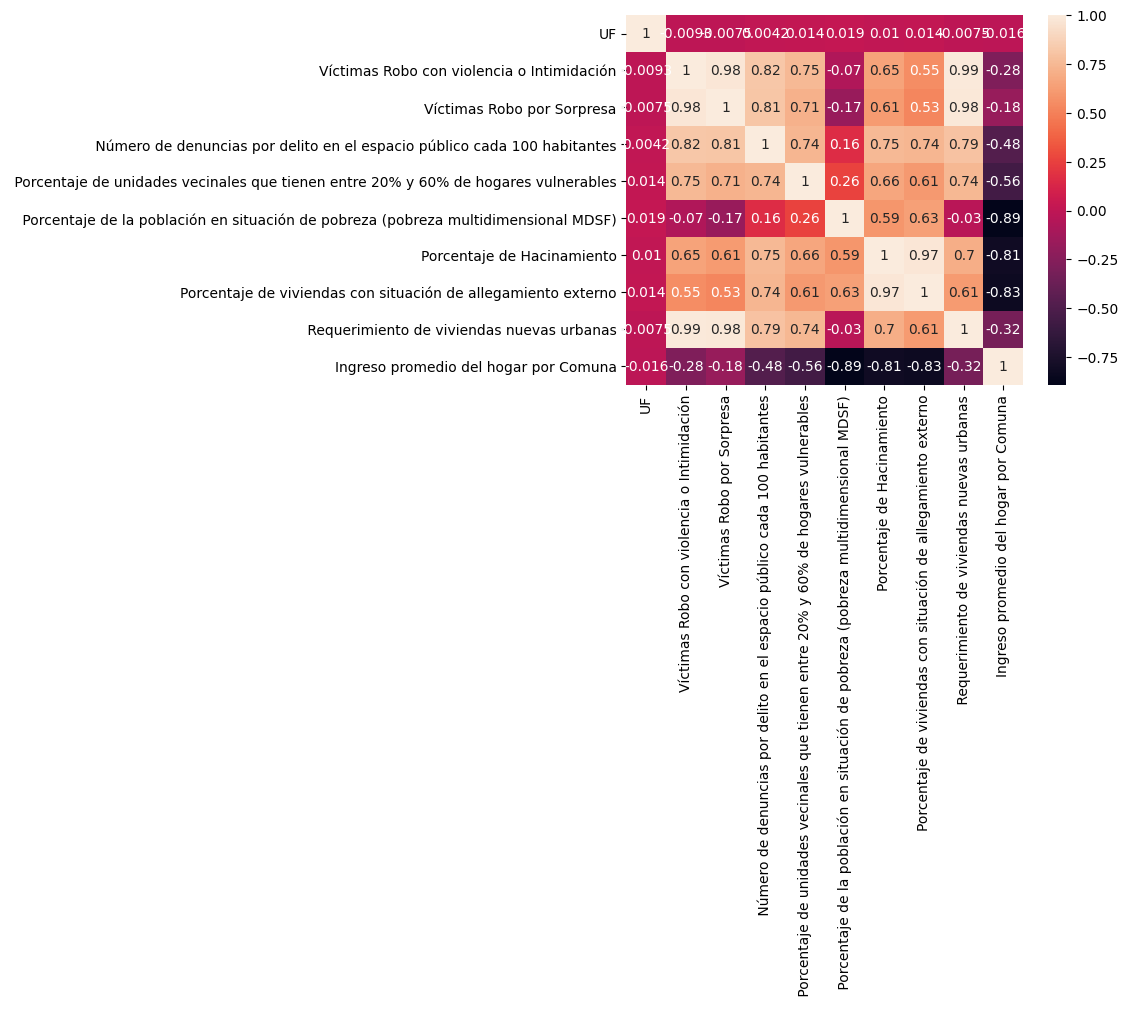

In [61]:
sns.heatmap(union[cols_to_plot5].corr(), annot=True)# podriamos eliminar el indice de robo por sorpresa y 'Porcentaje de viviendas con situación de allegamiento externo'

## transformamos cada comuna en una variable 

In [62]:
dummis_comunas= pd.get_dummies(union["Comuna"])
dummis_comunas.head()

,Buin,Cerrillos,Cerro Navia,Colina,Conchalí,El Bosque,El Monte,Estación Central,Huechuraba,Independencia,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Unimos los dos dataframe

In [63]:

pd.concat([union,dummis_comunas],axis=1)

,Comuna,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Precio,UF,Poblacion total 2020,Superficie de Área Verde m²,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
0,San Miguel,49,2,1,0,19/12/2022,99245550,2850,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
18,San Miguel,48,2,1,1,16/12/2022,100000000,2871,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
35,San Miguel,36,1,1,1,12/12/2022,88798650,2550,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
51,San Miguel,50,3,1,1,06/12/2022,73824760,2120,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
107,San Miguel,59,2,1,1,06/11/2022,107603070,3090,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,Buin,160,3,2,4,14/12/2022,233314100,6700,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
3752,Buin,160,3,2,4,14/12/2022,233314100,6700,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
4618,Buin,110,3,3,1,13/12/2022,261172500,7500,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
8053,Padre Hurtado,142,3,3,2,08/12/2022,177597300,5100,54922,393787.75,...,0,0,0,0,0,0,0,0,0,0


In [64]:
pisos=pd.concat([union,dummis_comunas],axis=1)
pisos

,Comuna,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Precio,UF,Poblacion total 2020,Superficie de Área Verde m²,...,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Vitacura,Ñuñoa
0,San Miguel,49,2,1,0,19/12/2022,99245550,2850,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
18,San Miguel,48,2,1,1,16/12/2022,100000000,2871,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
35,San Miguel,36,1,1,1,12/12/2022,88798650,2550,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
51,San Miguel,50,3,1,1,06/12/2022,73824760,2120,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
107,San Miguel,59,2,1,1,06/11/2022,107603070,3090,107828,212503.55,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,Buin,160,3,2,4,14/12/2022,233314100,6700,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
3752,Buin,160,3,2,4,14/12/2022,233314100,6700,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
4618,Buin,110,3,3,1,13/12/2022,261172500,7500,82267,603984.88,...,0,0,0,0,0,0,0,0,0,0
8053,Padre Hurtado,142,3,3,2,08/12/2022,177597300,5100,54922,393787.75,...,0,0,0,0,0,0,0,0,0,0


## Debemos cambiar uint8  a int de cada una de las nuevas columnas, que son las comunas

In [65]:
le=LabelEncoder()


for i in pisos.select_dtypes("uint8").keys(): # hemos cambiado  uint8  a int de cada una de las nuevas columnas, que son las comunas
    pisos[i]=le.fit_transform(pisos[i])

In [66]:
pisos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9626 entries, 0 to 8457
Data columns (total 87 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      9626 non-null   object 
 1   m2_totales                                                                                  9626 non-null   int64  
 2   Habitaciones                                                                                9626 non-null   int64  
 3   Banos                                                                                       9626 non-null   int64  
 4   Estacionamientos                                                                            9626 non-null   int64  
 5   Publi                                    

In [67]:
#pisos.to_excel("data/pisos_analis_data_sucio.xlsx", index = False)